In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
import numpy as np
from matplotlib import pyplot as plt
from regularization_helper import plot_it, get_simple_dataset, get_polynimial_set, plot_classifier, save_dataset
from sklearn import model_selection
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from fnn_helper import PlotLosses
from keras.callbacks import ModelCheckpoint 
from keras import regularizers

## Pre-procesamiento

### Cargo dataset y lo grafico

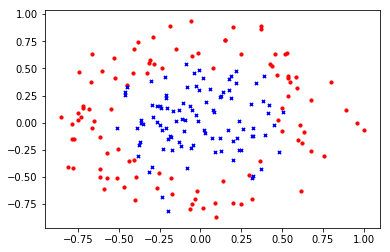

In [51]:
dataset_200 = np.load('200_samples_OK.npy')
X = dataset_200[:,:2]
y = dataset_200[:, 2]
plot_it(X,y)
plt.show()

### Divido en training y testing set

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.4, shuffle=True, random_state=500)
y_train = np.array(y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(120, 2)
(80, 2)
(120,)


## Modelo de una sola capa

### Armo arquitectura de la red

In [5]:
def get_basic_model(input_shape, output_size, lr=0.1):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr)
    model.add(Dense(output_size, input_dim=input_shape,
                    activation='sigmoid', 
                    kernel_initializer='normal', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


basic_model = get_basic_model(X_train.shape[1], 1)
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### Entreno el modelo

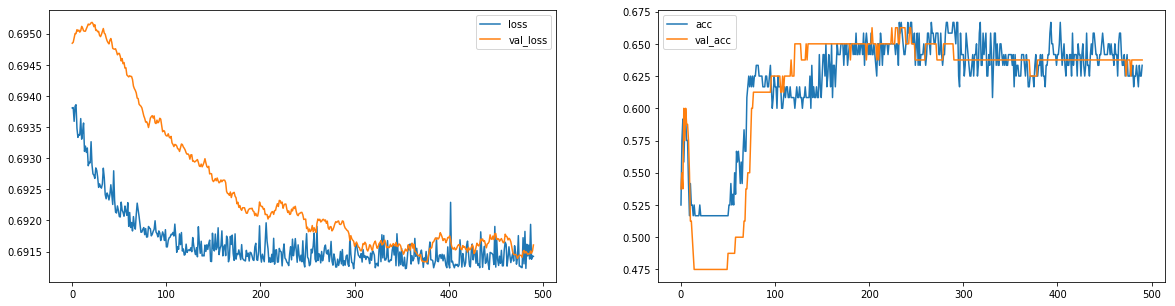

In [6]:
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
basic_model = get_basic_model(X_train.shape[1], 1, lr=0.05)
basic_model.fit(X_train, 
          y_train, batch_size = 25,
          epochs=500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

### Grafico resultados

In [50]:
score_basic_model = basic_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", score_basic_model[0])
print("accuracy: ", score_basic_model[1])

loss:  0.691498041153
accuracy:  0.6375


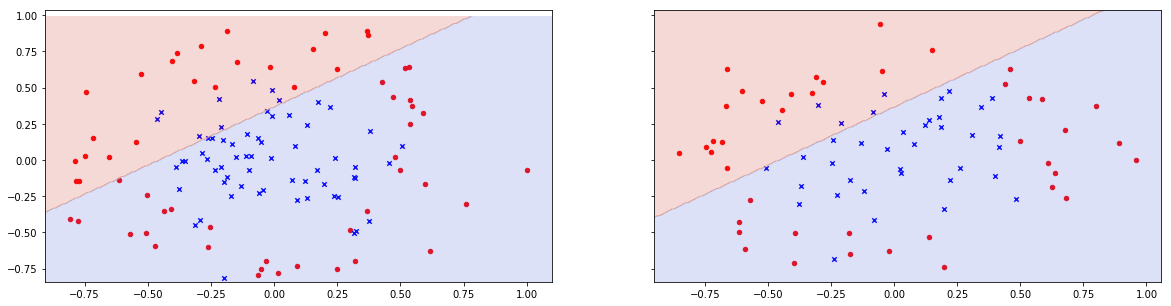

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, basic_model.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, basic_model.predict, 1, N = 250, ax=ax2)
plt.show()

### Conclusiones
- ¿Es posible mejorar el modelo?
- UNDERFITTING
- Proponga dos posibles soluciones para mejorar el modelo: Agrandar arquitectura de la red, Regresión polinomial

## Modelo de dos capas

### Armo arquitectura de la red

In [68]:
def get_two_layer_model(input_shape, output_size, hidden_units= 10, lr=0.1, decay=0.0):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
two_layer_model = get_two_layer_model(X_train.shape[1], 1, lr=1)
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
Salida (Dense)               (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Entreno el modelo

**Notar la diferencia entre lr entre este modelo y el anterior**

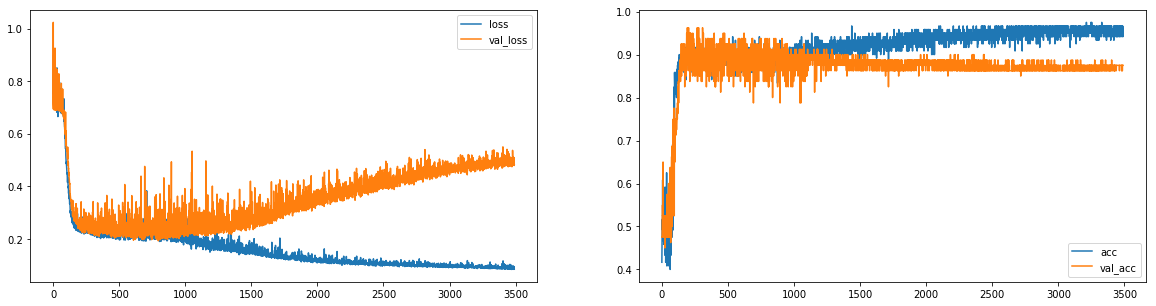

Epoch 03490: val_loss did not improve
Epoch 03491: val_loss did not improve
Epoch 03492: val_loss did not improve
Epoch 03493: val_loss did not improve
Epoch 03494: val_loss did not improve
Epoch 03495: val_loss did not improve
Epoch 03496: val_loss did not improve
Epoch 03497: val_loss did not improve
Epoch 03498: val_loss did not improve
Epoch 03499: val_loss did not improve


In [41]:
plot_losses = PlotLosses(plot_interval=10, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.mnist.hdf5', verbose=1, save_best_only=True)
two_layer_model = get_two_layer_model(X_train.shape[1], 1, lr=2)
two_layer_model.fit(X_train, 
          y_train, batch_size = 25,
          epochs=3500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

### Grafico resultados

In [48]:
score_two_layer_model = two_layer_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", score_two_layer_model[0])
print("accuracy: ", score_two_layer_model[1])

loss:  0.472694370151
accuracy:  0.875


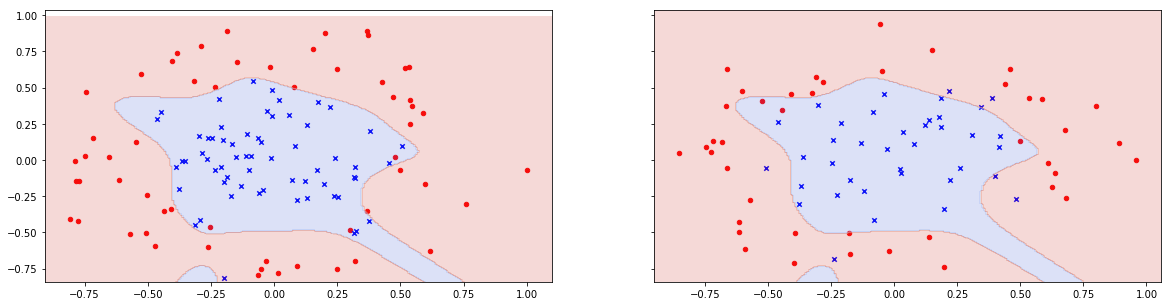

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, two_layer_model.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, two_layer_model.predict, 1, N = 250, ax=ax2)
plt.show()

### Conclusiones:
- OVERFITTING
- ¿Posibles soluciones? Early Stop? Salir a buscar mas datos? Regularización? Dropout?

## Soluciones para el overfitting

### Early stop

In [49]:
score_two_layer_model_early_stop = two_layer_model_early_stop.evaluate(X_test, y_test, verbose=0)
print("loss: ", score_two_layer_model_early_stop[0])
print("accuracy: ", score_two_layer_model_early_stop[1])

loss:  0.192532886565
accuracy:  0.9375


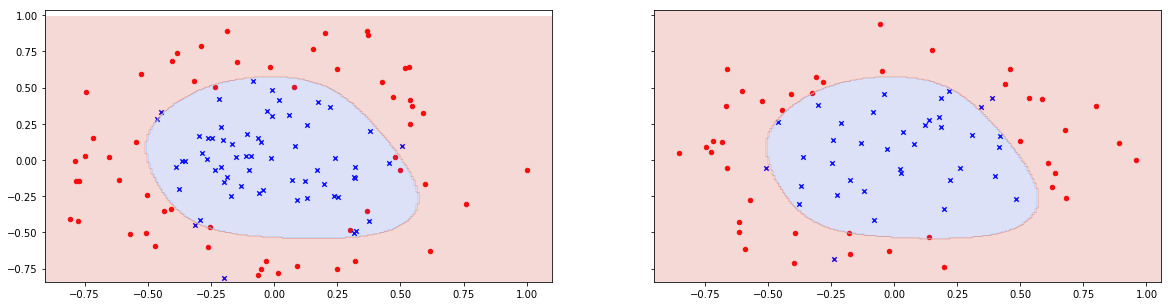

In [44]:
two_layer_model_early_stop = get_two_layer_model(X_train.shape[1], 1, lr=2)
two_layer_model_early_stop.load_weights('two_layer_model.mnist.hdf5')
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, two_layer_model_early_stop.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, two_layer_model_early_stop.predict, 1, N = 250, ax=ax2)
plt.show()

### ¿Tenemos mas data?
Cantidad de muestras mucho mayor a la cantidad de parametros

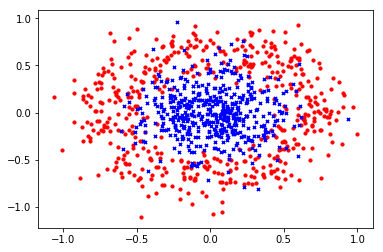

In [54]:
dataset_1000 = np.load('1000_samples.npy')
X_1000 = dataset_1000[:,:2]
y_1000 = dataset_1000[:, 2]
plot_it(X_1000,y_1000)
plt.show()

In [56]:
X_1000_train, X_1000_test, y_1000_train, y_1000_test = model_selection.train_test_split(X_1000,y_1000, test_size=0.4, shuffle=True, random_state=500)
print(X_1000_train.shape)
print(X_1000_test.shape)
print(y_1000_train.shape)

(600, 2)
(400, 2)
(600,)


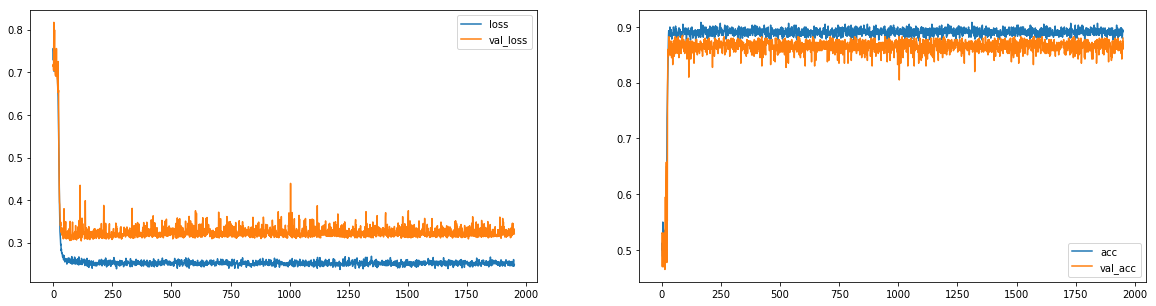

In [59]:
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_1000_test, y_val_categorical=y_1000_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.1000.hdf5', verbose=0, save_best_only=True)
two_layer_model_1000 = get_two_layer_model(X_train.shape[1], 1, lr=2)
two_layer_model_1000.fit(X_1000_train, 
          y_1000_train, batch_size = 25,
          epochs=2000, 
          verbose=0, 
          validation_data=(X_1000_test, y_1000_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [60]:
score_two_layer_model_1000 = two_layer_model_1000.evaluate(X_test, y_test, verbose=0)
print("loss: ", score_two_layer_model_1000[0])
print("accuracy: ", score_two_layer_model_1000[1])

loss:  0.279717999697
accuracy:  0.9


#### Como soluciono el ruido?

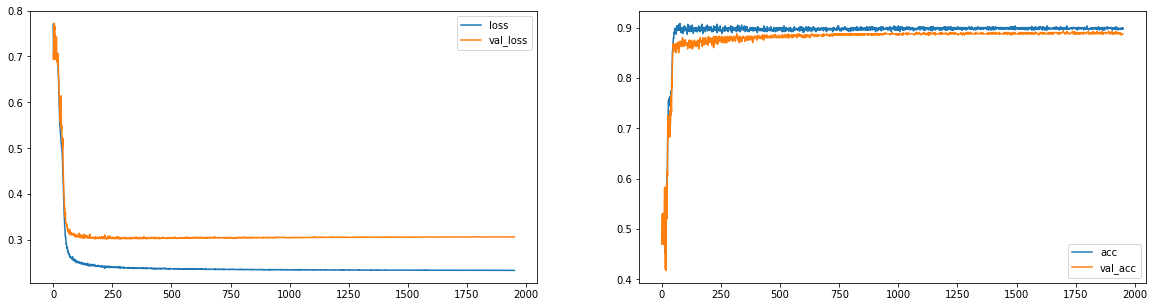

In [65]:
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_1000_test, y_val_categorical=y_1000_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.1000.hdf5', verbose=0, save_best_only=True)
two_layer_model_1000 = get_two_layer_model(X_train.shape[1], 1, lr=2, decay=1e-3)
two_layer_model_1000.fit(X_1000_train, 
          y_1000_train, batch_size = 25,
          epochs=2000, 
          verbose=0, 
          validation_data=(X_1000_test, y_1000_test), 
          callbacks=[plot_losses, checkpointer],
         )

### Achico red neuronal

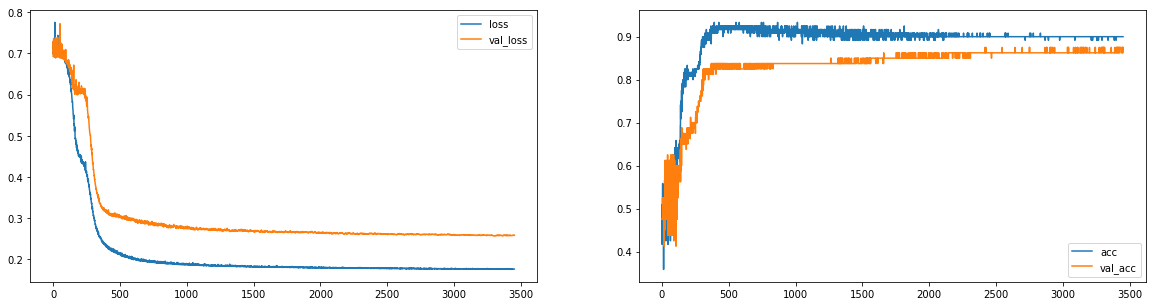

In [75]:
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.h3.hdf5', verbose=0, save_best_only=True)
two_layer_model_h3 = get_two_layer_model(X_train.shape[1], 1, hidden_units=3,lr=2, decay=1e-3)
two_layer_model_h3.fit(X_train, 
          y_train, batch_size = 25,
          epochs=3500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

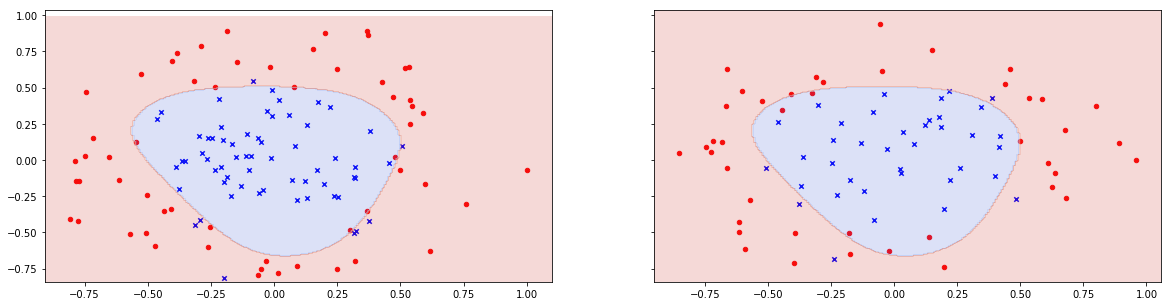

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, two_layer_model_h3.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, two_layer_model_h3.predict, 1, N = 250, ax=ax2)
plt.show()

### Dropout

In [78]:
def get_two_layer_model_dropout(input_shape, output_size, hidden_units=10, lr=0.1, prob=0.1, decay=0.0):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dropout(prob))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

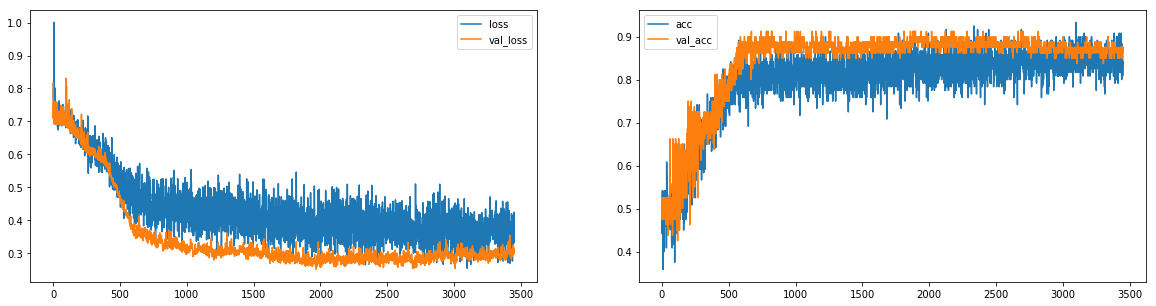

In [82]:
# Variar prob: 0.1, 0.2, 0.5
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.dropout.hdf5', verbose=0, save_best_only=True)
two_layer_model_dropout = get_two_layer_model_dropout(X_train.shape[1], 1, lr=2, decay=0.0, prob=0.5)
two_layer_model_dropout.fit(X_train, 
          y_train, batch_size = 25,
          epochs=3500, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

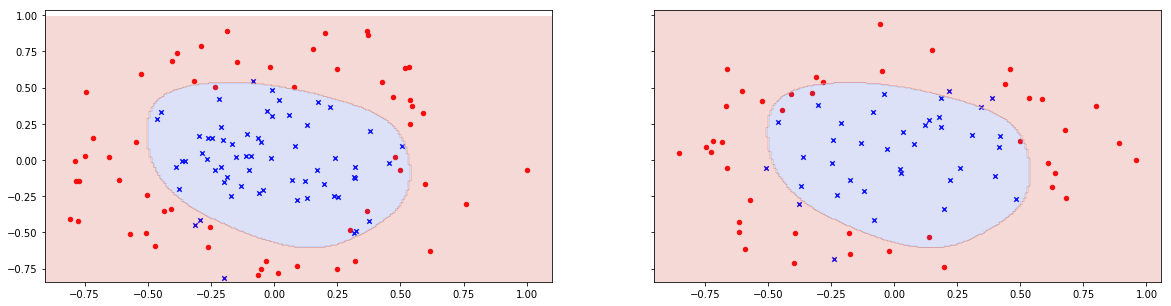

In [84]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, two_layer_model_dropout.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, two_layer_model_dropout.predict, 1, N = 250, ax=ax2)
plt.show()

## Regularización L2

In [90]:
def get_two_layer_model_L2(input_shape, output_size, hidden_units=10, lr=0.1, l2_lambda=0.1, decay=0.0):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    regularizer = regularizers.l2(l2_lambda)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida',
                    kernel_regularizer=regularizer, 
                    bias_regularizer=regularizer
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

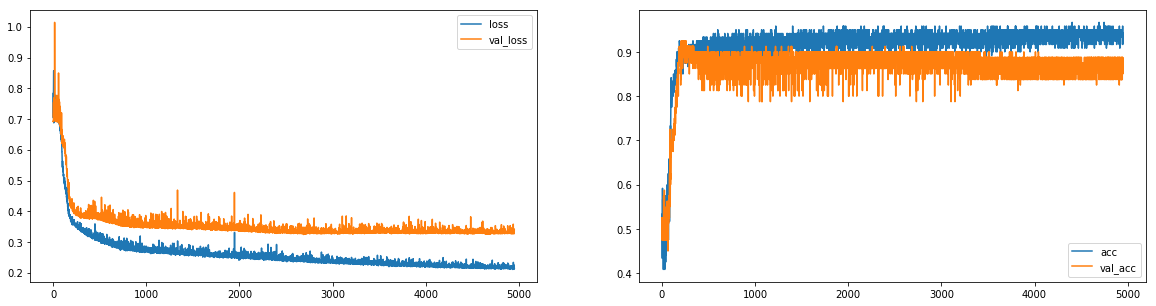

In [98]:
# Variar lambda: 0.1, 0.01, 0.005, 0.001
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.l2.hdf5', verbose=0, save_best_only=True)
two_layer_model_L2 = get_two_layer_model_L2(X_train.shape[1], 1, lr=2, decay=0.0, l2_lambda=0.001)
two_layer_model_L2.fit(X_train, 
          y_train, batch_size = 25,
          epochs=5000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

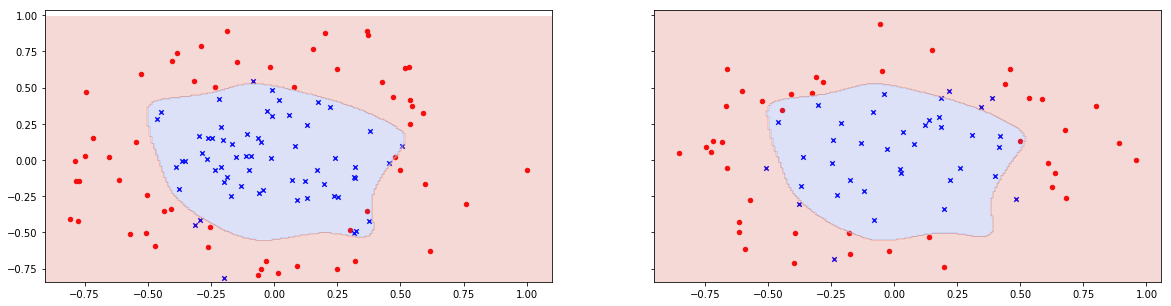

In [99]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,5))
plot_classifier(X_train, y_train, two_layer_model_L2.predict, 1, N = 250, ax=ax1)
plot_classifier(X_test, y_test, two_layer_model_L2.predict, 1, N = 250, ax=ax2)
plt.show()

## Regularización L1

In [101]:
def get_two_layer_model_L1(input_shape, output_size, hidden_units=10, lr=0.1, l1_lambda=0.1, decay=0.0):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr, decay=decay)
    regularizer = regularizers.l1(l1_lambda)
    model.add(Dense(hidden_units,input_dim=input_shape,  activation='sigmoid', ))
    model.add(Dense(output_size, 
                    activation='sigmoid', 
                    kernel_initializer='zeros', 
                    name='Salida',
                    kernel_regularizer=regularizer, 
                    bias_regularizer=regularizer
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

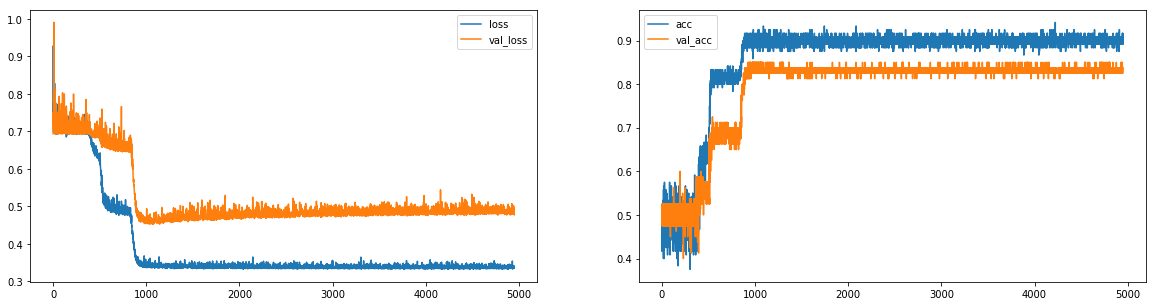

In [104]:
# Variar lambda: 0.001, 0.005
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='two_layer_model.l1.hdf5', verbose=0, save_best_only=True)
two_layer_model_L1 = get_two_layer_model_L1(X_train.shape[1], 1, lr=2, decay=0.0, l1_lambda=0.005)
two_layer_model_L1.fit(X_train, 
          y_train, batch_size = 25,
          epochs=5000, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

## Momentum